# Задание

Задание 5. Создание предиктивной модели рейтинга мобильных приложений на площадке крупного агрегатора. Необходимо провести анализ данных и ответить на вопросы:  
1. Как информация о приложении влияет на рейтинг пользователей  
2. Попробуйте сравнить статистику приложений для разных групп  

# Загрузка данных

In [6]:
import pandas as pd
df_metrics = pd.read_csv("AppleStore.csv")
print(df_metrics.shape)
df_metrics.head()

(7197, 17)


,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [10]:
df_desc = pd.read_csv("appleStore_description.csv")
print(df_desc.shape)
df_desc.head()

(7197, 4)


,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,On more than 250 million devices around the wo...


In [17]:
df = df_metrics.merge(df_desc[['id', 'app_desc']], on='id', how='left')
print(df.shape)
df.head()

(7197, 18)


,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...


# Обработка

In [19]:
df = df.drop(columns=['Unnamed: 0'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
 16  app_desc          7197 non-null   object 


In [20]:
print(df.isnull().sum())

id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
app_desc            0
dtype: int64


# EDA

Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
 16  app_desc     

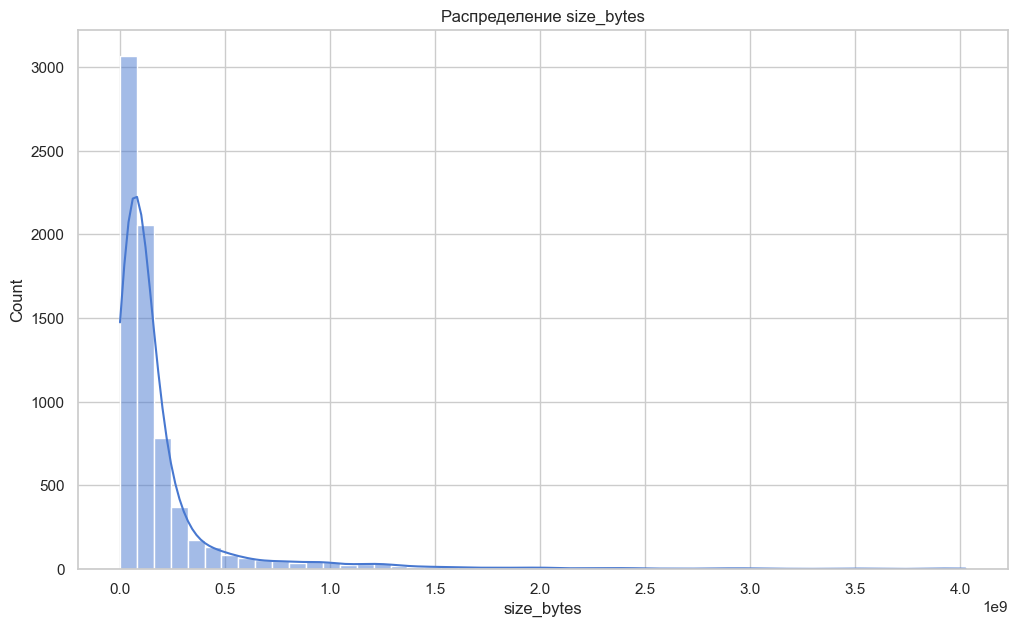

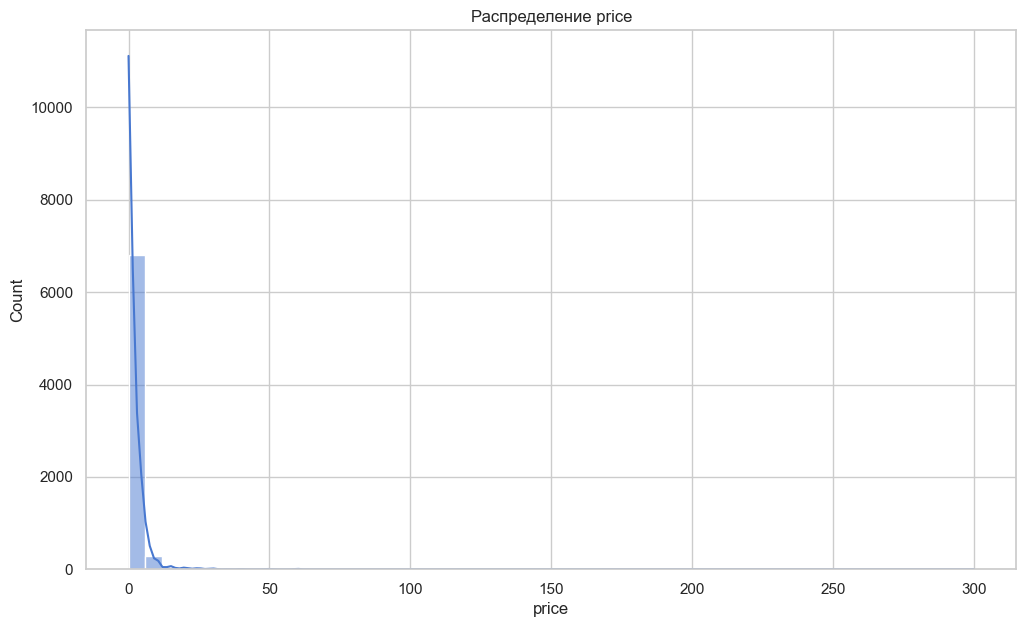

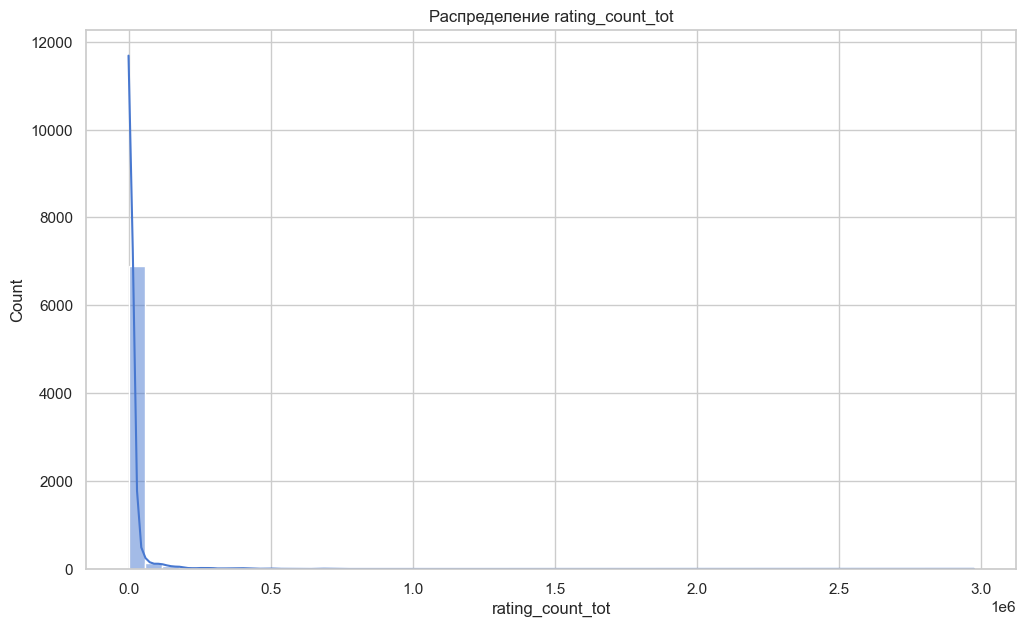

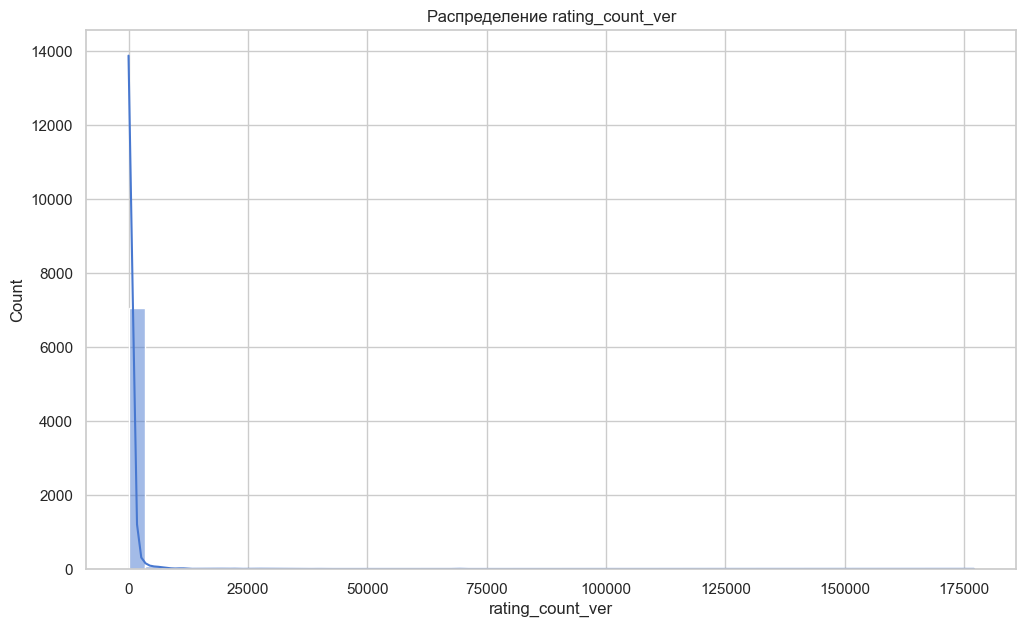

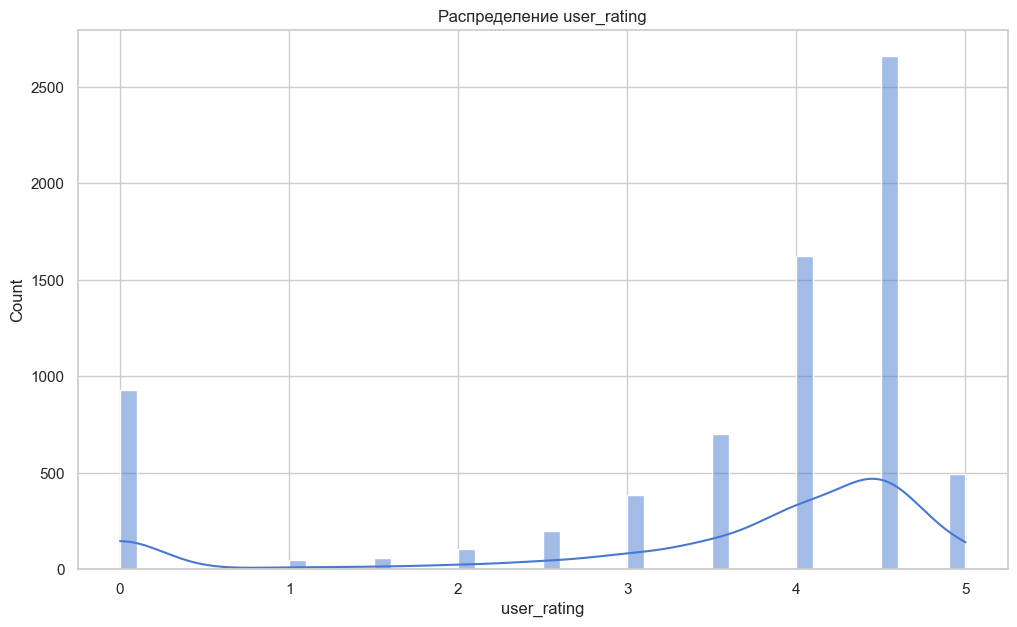

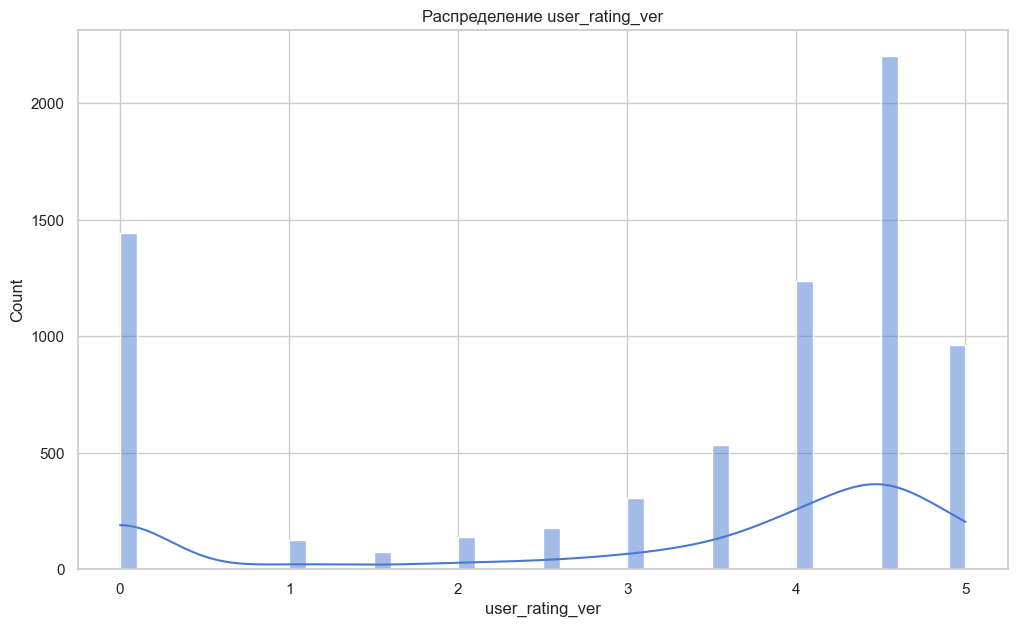

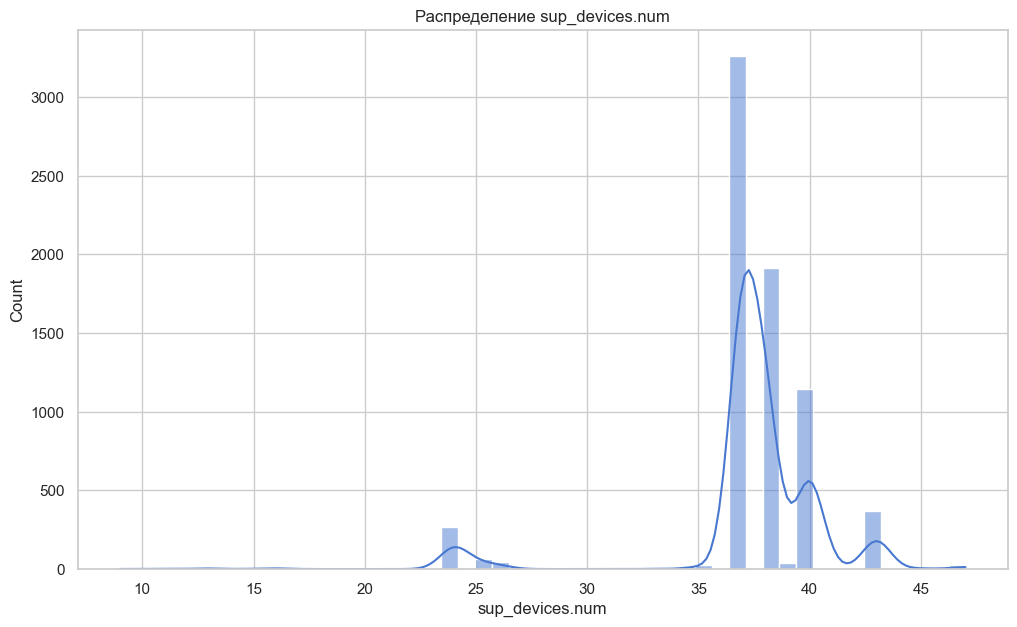

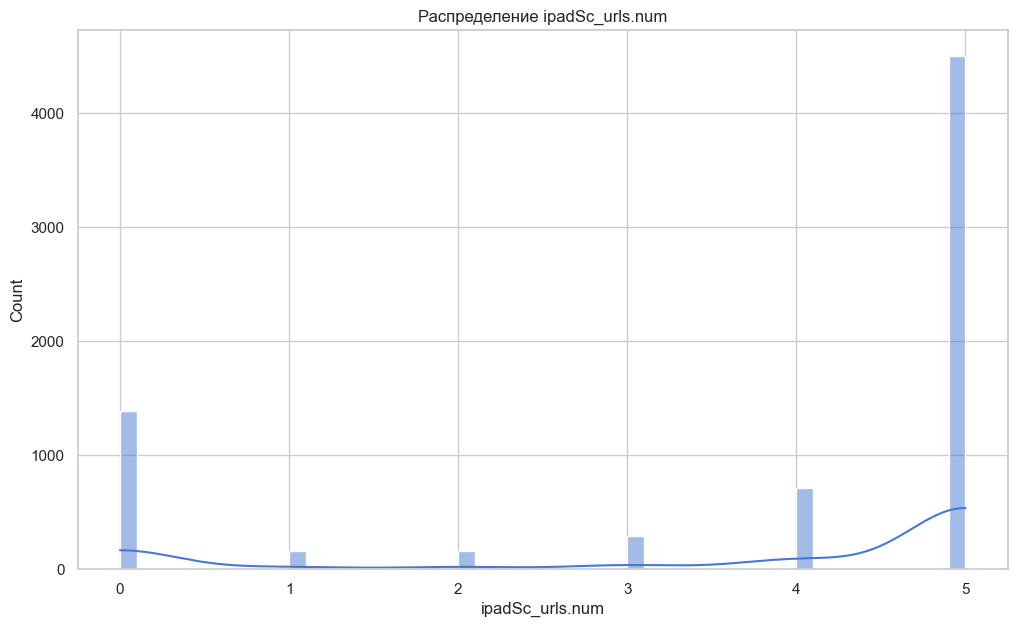

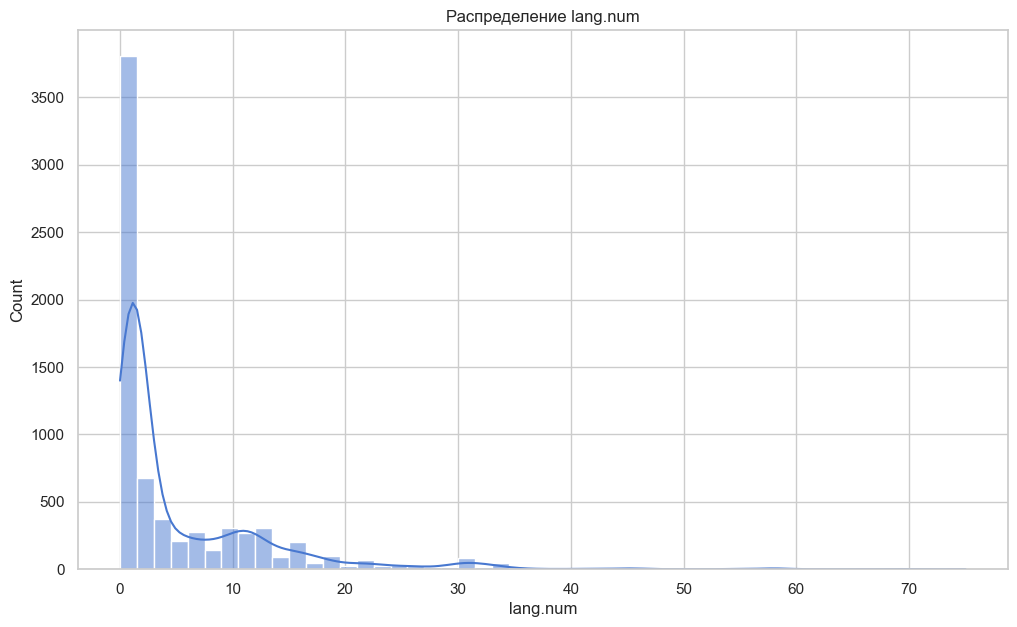

Категория "currency": 1 уникальных значений


currency
USD    7197
Name: count, dtype: int64

Категория "ver": 1590 уникальных значений


ver
1.0      317
1.1      266
1.2      218
1.0.0    187
1.0.1    180
1.3      136
1.0.2    129
1.4      108
1.0.3     95
1.5       95
Name: count, dtype: int64

Категория "cont_rating": 4 уникальных значений


cont_rating
4+     4433
12+    1155
9+      987
17+     622
Name: count, dtype: int64

Категория "prime_genre": 23 уникальных значений


prime_genre
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Name: count, dtype: int64

Категория "vpp_lic": 2 уникальных значений


vpp_lic
1    7147
0      50
Name: count, dtype: int64

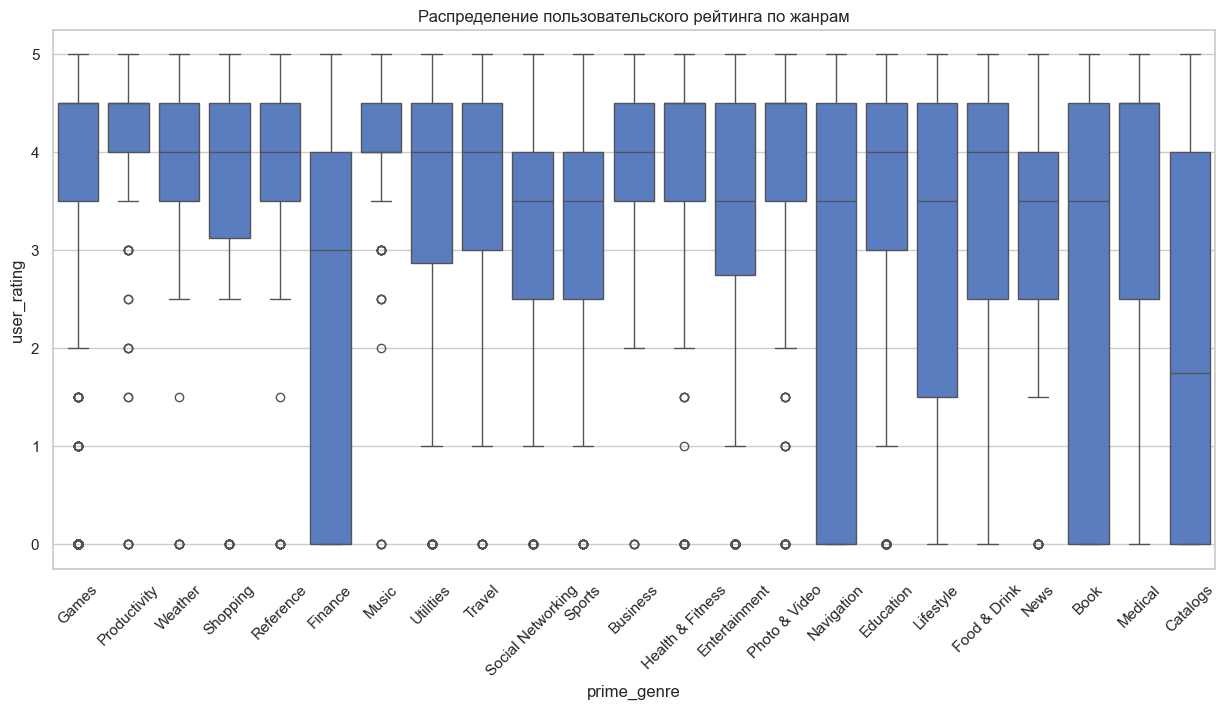

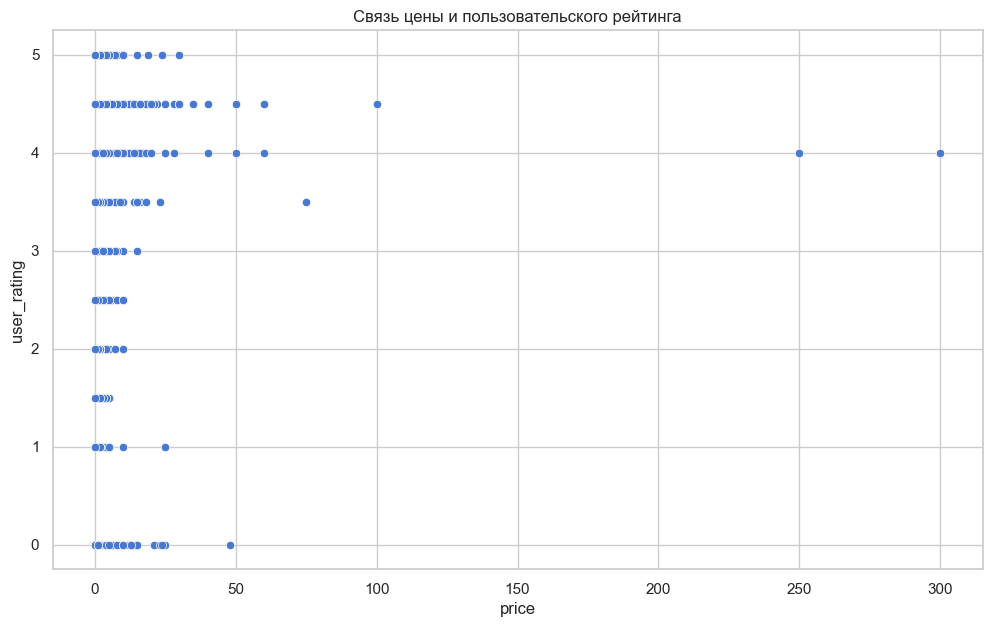

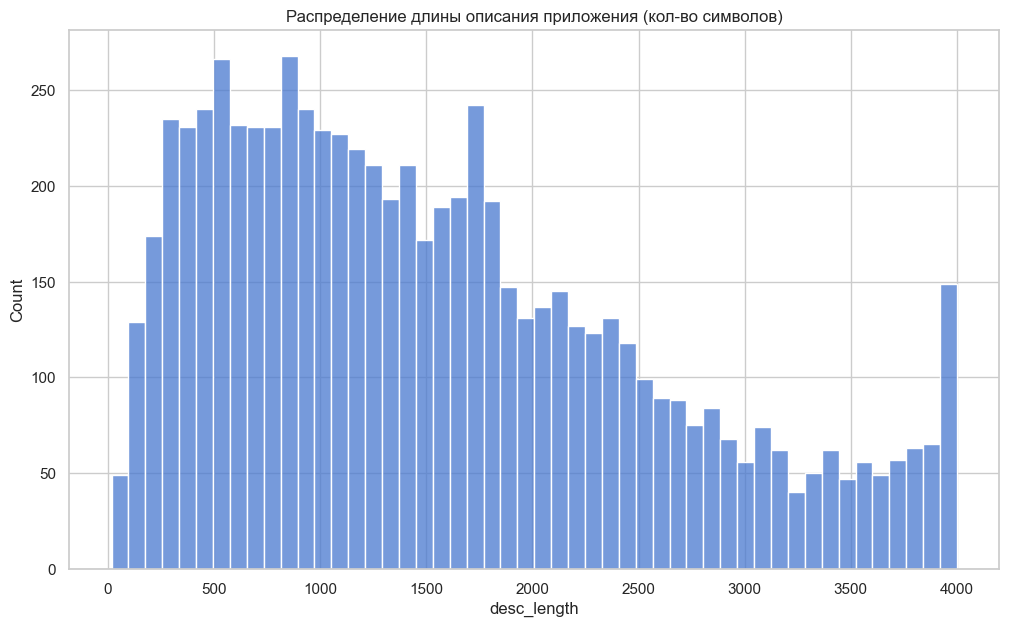

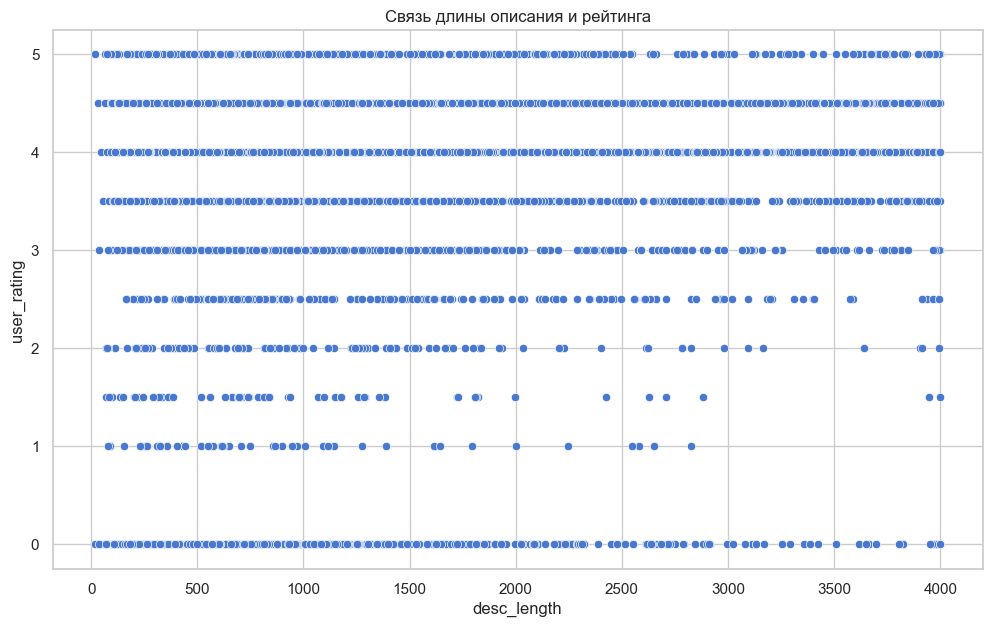

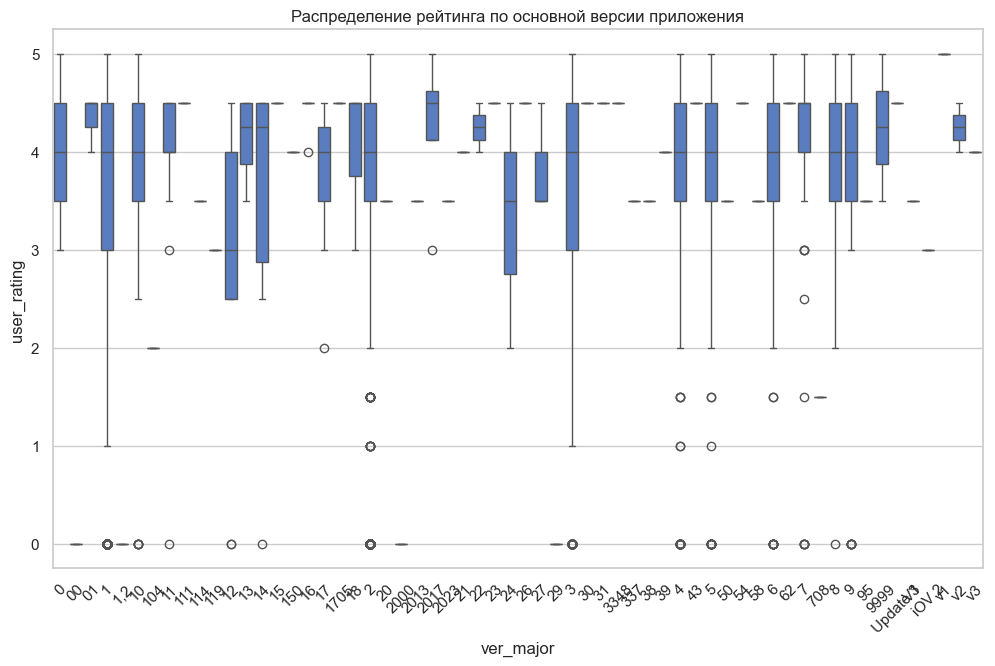

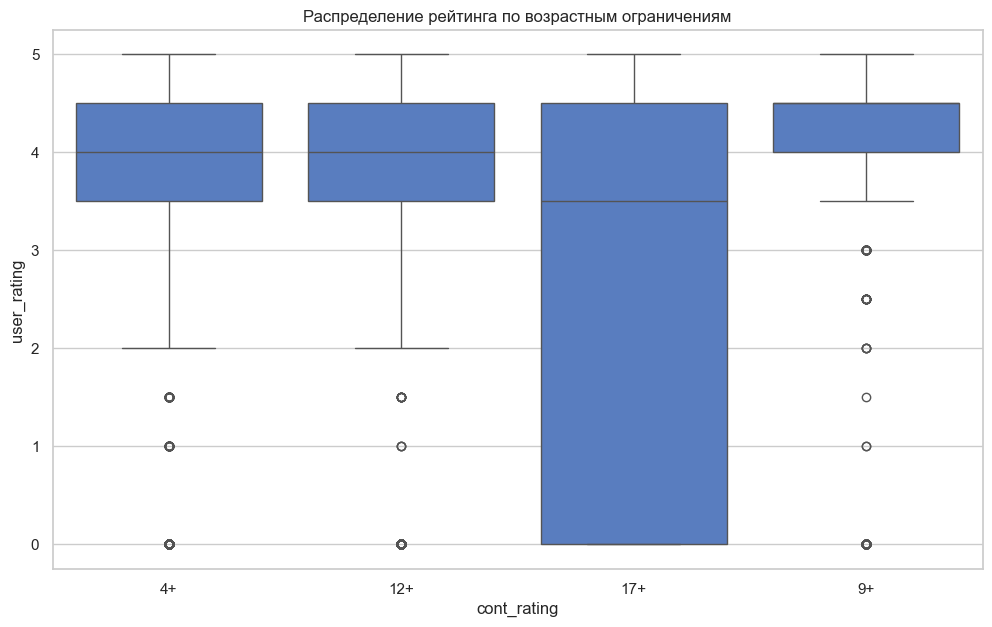

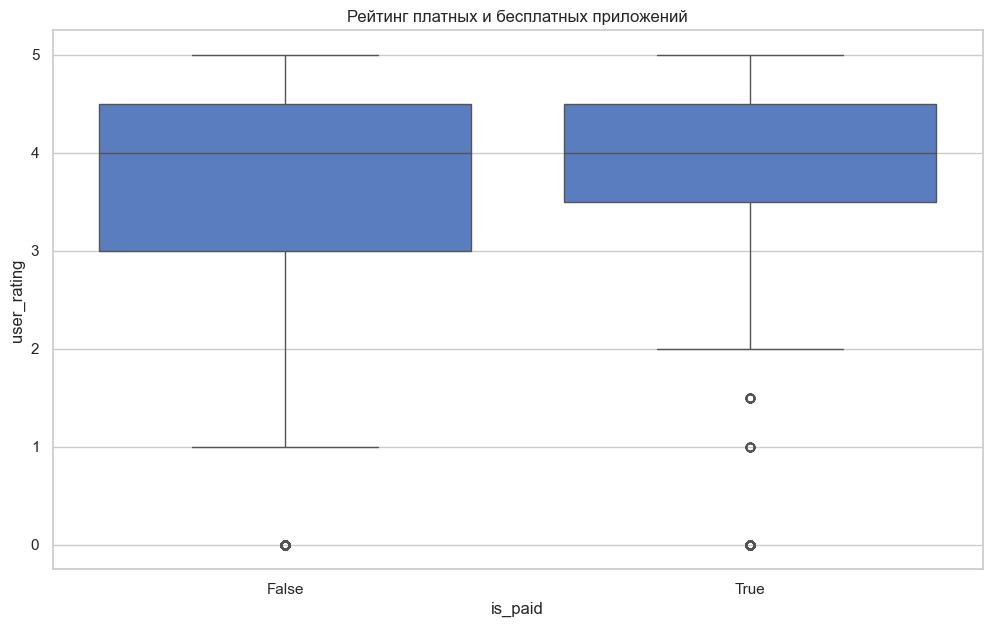

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (12, 7)


# 1. Общая информация и пропуски
print("Общая информация о датасете:")
print(df.info())
print("\nСтатистика по числовым признакам:")
print(df.describe().T)

print("\nПроверка на пропуски:")
print(df.isna().sum())

# 2. Распределения ключевых числовых переменных
num_cols = ['size_bytes', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num']

for col in num_cols:
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Распределение {col}')
    plt.show()

# 3. Категориальные признаки — сколько уникальных значений
cat_cols = ['currency', 'ver', 'cont_rating', 'prime_genre', 'vpp_lic']

for col in cat_cols:
    print(f'Категория "{col}": {df[col].nunique()} уникальных значений')
    display(df[col].value_counts().head(10))

# 4. Анализ распределения рейтингов по жанрам (prime_genre)
plt.figure(figsize=(15, 7))
sns.boxplot(x='prime_genre', y='user_rating', data=df)
plt.xticks(rotation=45)
plt.title('Распределение пользовательского рейтинга по жанрам')
plt.show()

# 5. Влияние цены на рейтинг
sns.scatterplot(x='price', y='user_rating', data=df)
plt.title('Связь цены и пользовательского рейтинга')
plt.show()

# 6. Анализ текста описания: длина app_desc
df['desc_length'] = df['app_desc'].apply(lambda x: len(str(x)))
sns.histplot(df['desc_length'], bins=50)
plt.title('Распределение длины описания приложения (кол-во символов)')
plt.show()

# Связь длины описания и рейтинга
sns.scatterplot(x='desc_length', y='user_rating', data=df)
plt.title('Связь длины описания и рейтинга')
plt.show()

# 7. Проверка зависимости рейтинга от версии приложения (кол-во обновлений)
df['ver_major'] = df['ver'].apply(lambda x: str(x).split('.')[0] if pd.notnull(x) else '0')
ver_order = sorted(df['ver_major'].unique())
sns.boxplot(x='ver_major', y='user_rating', data=df, order=ver_order)
plt.title('Распределение рейтинга по основной версии приложения')
plt.xticks(rotation=45)
plt.show()

# 8. Рейтинг в зависимости от контентного рейтинга (cont_rating)
sns.boxplot(x='cont_rating', y='user_rating', data=df)
plt.title('Распределение рейтинга по возрастным ограничениям')
plt.show()

# 9. Распределение платных и бесплатных приложений по рейтингу
df['is_paid'] = df['price'] > 0
sns.boxplot(x='is_paid', y='user_rating', data=df)
plt.title('Рейтинг платных и бесплатных приложений')
plt.show()


# 1. Как информация о приложении влияет на рейтинг пользователей  

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
 16  app_desc          7197 non-null   object 


Корреляция числовых признаков с user_rating:
user_rating         1.000000
user_rating_ver     0.774140
desc_length         0.273644
ipadSc_urls.num     0.265671
lang.num            0.170976
rating_count_tot    0.083310
vpp_lic             0.069816
rating_count_ver    0.068754
size_bytes          0.066256
price               0.046601
sup_devices.num    -0.042451
Name: user_rating, dtype: float64

Медианный user_rating по currency:


currency
USD    4.0
Name: user_rating, dtype: float64


Медианный user_rating по ver_major:


ver_major
v1          5.00
01          4.50
18          4.50
111         4.50
16          4.50
1705        4.50
2017        4.50
43          4.50
26          4.50
30          4.50
23          4.50
15          4.50
31          4.50
54          4.50
3348        4.50
62          4.50
7           4.50
Update 1    4.50
v2          4.25
9999        4.25
14          4.25
22          4.25
13          4.25
2           4.00
17          4.00
150         4.00
1           4.00
0           4.00
v3          4.00
9           4.00
8           4.00
6           4.00
39          4.00
5           4.00
3           4.00
4           4.00
21          4.00
10          4.00
11          4.00
20          3.50
114         3.50
24          3.50
2013        3.50
2023        3.50
V3          3.50
50          3.50
337         3.50
58          3.50
95          3.50
38          3.50
27          3.50
119         3.00
12          3.00
iOV 2       3.00
104         2.00
708         1.50
2000        0.00
1,2         0.00
00  


Медианный user_rating по cont_rating:


cont_rating
9+     4.5
12+    4.0
4+     4.0
17+    3.5
Name: user_rating, dtype: float64


Медианный user_rating по prime_genre:


prime_genre
Medical              4.50
Health & Fitness     4.50
Productivity         4.50
Photo & Video        4.50
Games                4.50
Food & Drink         4.00
Business             4.00
Weather              4.00
Utilities            4.00
Travel               4.00
Shopping             4.00
Education            4.00
Music                4.00
Reference            4.00
Entertainment        3.50
News                 3.50
Navigation           3.50
Book                 3.50
Lifestyle            3.50
Social Networking    3.50
Sports               3.50
Finance              3.00
Catalogs             1.75
Name: user_rating, dtype: float64


Медианный user_rating по is_paid:


is_paid
False    4.0
True     4.0
Name: user_rating, dtype: float64


Топ слов, чаще встречающихся в описаниях приложений с высоким рейтингом:


,word,high_rating_count,low_rating_count,high_to_low_ratio
817,solitaire,285,0,286.000000
888,toca,119,0,120.000000
382,gameloft,114,0,115.000000
280,ea,118,1,59.500000
269,dragons,105,1,53.000000
932,upgrades,152,2,51.000000
998,zombies,144,3,36.250000
789,shooter,102,2,34.333333
867,tactics,100,2,33.666667
907,treasure,118,3,29.750000



Топ слов, чаще встречающихся в описаниях приложений с низким рейтингом:


,word,high_rating_count,low_rating_count,high_to_low_ratio
458,information,525,322,1.628483
83,baby,215,133,1.611940
21,6s,99,62,1.587302
760,santa,126,81,1.548780
447,imessage,99,64,1.538462
976,wifi,103,67,1.529412
587,movies,100,67,1.485294
741,results,146,98,1.484848
479,japanese,118,80,1.469136
600,news,253,175,1.443182


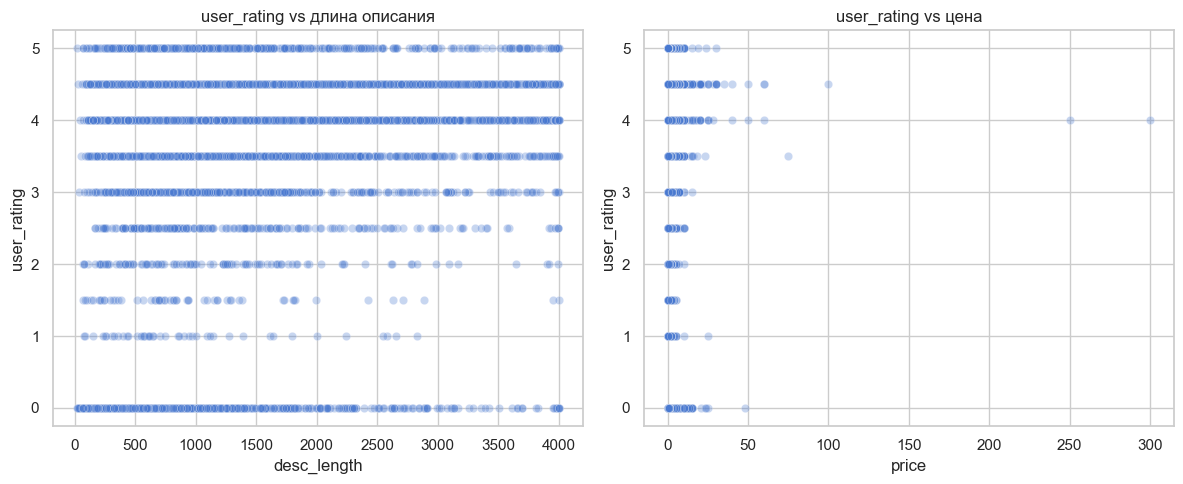

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

df['desc_length'] = df['app_desc'].apply(len)
df['ver_major'] = df['ver'].str.split('.').str[0]
df['is_paid'] = df['price'] > 0

# 1. Посмотрим корреляцию числовых признаков с user_rating
num_cols = ['size_bytes', 'price', 'rating_count_tot', 'rating_count_ver',
            'user_rating_ver', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 
            'vpp_lic', 'desc_length']

corr = df[num_cols + ['user_rating']].corr()
print("Корреляция числовых признаков с user_rating:")
print(corr['user_rating'].sort_values(ascending=False))

# 2. Анализ категориальных признаков: median user_rating по категориям
cat_cols = ['currency', 'ver_major', 'cont_rating', 'prime_genre', 'is_paid']

for col in cat_cols:
    print(f"\nМедианный user_rating по {col}:")
    display(df.groupby(col)['user_rating'].median().sort_values(ascending=False))

# 3. Простой текстовый анализ app_desc: топ-20 слов в описаниях приложений с высоким и низким рейтингом

vectorizer = CountVectorizer(stop_words='english', max_features=1000)

high_rating_desc = df[df['user_rating'] >= 4.5]['app_desc']
low_rating_desc = df[df['user_rating'] <= 3.0]['app_desc']

high_counts = vectorizer.fit_transform(high_rating_desc).toarray().sum(axis=0)
low_counts = vectorizer.transform(low_rating_desc).toarray().sum(axis=0)

words = vectorizer.get_feature_names_out()

freq_df = pd.DataFrame({
    'word': words,
    'high_rating_count': high_counts,
    'low_rating_count': low_counts
})
freq_df['high_to_low_ratio'] = (freq_df['high_rating_count'] + 1) / (freq_df['low_rating_count'] + 1)
freq_df = freq_df.sort_values(by='high_to_low_ratio', ascending=False)

print("\nТоп слов, чаще встречающихся в описаниях приложений с высоким рейтингом:")
display(freq_df.head(20))

print("\nТоп слов, чаще встречающихся в описаниях приложений с низким рейтингом:")
display(freq_df.tail(20))

# 4. Визуализация корреляции user_rating с desc_length и price
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(data=df, x='desc_length', y='user_rating', alpha=0.3)
plt.title('user_rating vs длина описания')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='price', y='user_rating', alpha=0.3)
plt.title('user_rating vs цена')

plt.tight_layout()
plt.show()


1. Корреляция числовых признаков с рейтингом user_rating
- Интересно, что длина описания desc_length положительно коррелирует с рейтингом (0.27), то есть более подробные описания выигрывают.
- Количество скриншотов для iPad (ipadSc_urls.num) и количество поддерживаемых языков (lang.num) тоже положительно влияют на рейтинг.
- Остальные числовые параметры (цена, размер приложения, количество оценок) имеют низкую корреляцию с рейтингом — влияние минимальное.

2. Влияние категориальных признаков на рейтинг
- Основная версия приложения (ver_major) — версии с более частыми обновлениями (например, v1, 01, 18, 111 и т.д.) имеют высокие медианные рейтинги (4.5–5.0).
- Возрастной рейтинг (cont_rating) — приложения для аудитории 9+ и выше имеют более высокий медианный рейтинг (4.5), а для 17+ рейтинг ниже (3.5).
- Жанр (prime_genre) — лучшие рейтинги у медицинских, фитнес и продуктивных приложений

3. Анализ описания приложений (текст)
- В описаниях приложений с высоким рейтингом чаще встречаются слова, связанные с играми и развлечениями: solitaire, gameloft, dragons, shooter, quest, ninja, workouts
- Описания с более техническими, общими словами, скорее всего, относятся к менее интересным или менее качественным приложениям


**Выводы:**
1. Подробное описание (длина текста) связано с более высоким рейтингом, вероятно, потому что оно лучше информирует пользователя.
2. Жанр и возрастной рейтинг имеют значительное влияние: пользователи ставят выше медицинские, фитнес и игры.
3. Версия приложения важна: активно поддерживаемые и обновляемые приложения имеют лучшие рейтинги.
4. Текст описания — сильный индикатор интереса пользователей. Частота определённых слов в описании помогает отличить высоко и низко рейтинговые приложения.

# 2. Попробуйте сравнить статистику приложений для разных групп  

                   user_rating    size_bytes     price  rating_count_tot  \
prime_genre                                                                
Medical                   4.50  3.763890e+08  8.776087        592.782609   
Health & Fitness          4.50  9.010664e+07  1.916444       9913.172222   
Productivity              4.50  7.844064e+07  4.330562       8051.325843   
Photo & Video             4.50  6.852190e+07  1.473295      14352.280802   
Games                     4.50  2.836583e+08  1.432923      13691.996634   
Food & Drink              4.00  7.759500e+07  1.552381      13938.619048   
Business                  4.00  6.416849e+07  5.116316       4788.087719   
Weather                   4.00  6.144138e+07  1.605417      22181.027778   
Utilities                 4.00  5.429006e+07  1.647621       6863.822581   
Travel                    4.00  8.270691e+07  1.120370      14129.444444   
Shopping                  4.00  9.334683e+07  0.016311      18615.327869   
Education   

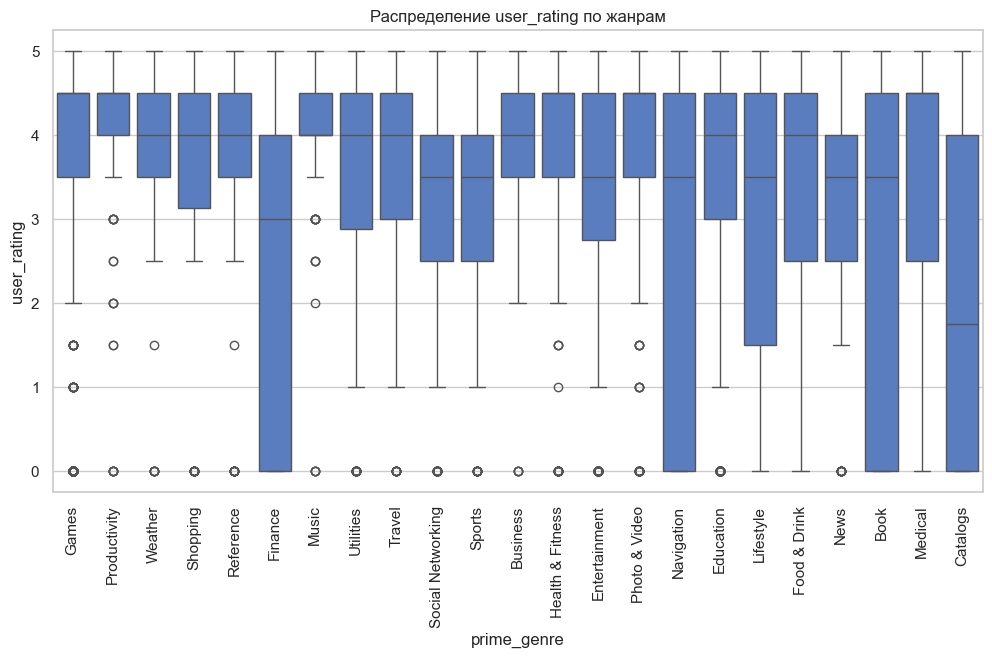

is_paid
False    4.0
True     4.0
Name: user_rating, dtype: float64


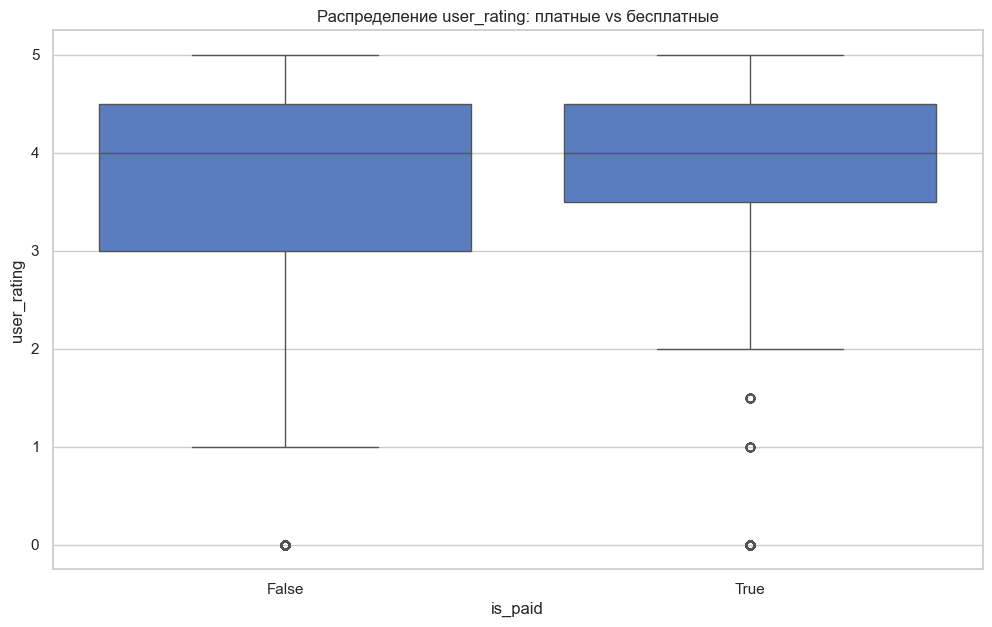

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Средний рейтинг и размер по жанрам
genre_stats = df.groupby('prime_genre').agg({
    'user_rating': 'median',
    'size_bytes': 'mean',
    'price': 'mean',
    'rating_count_tot': 'mean',
    'desc_length': 'mean',
}).rename(columns={'id': 'count'}).sort_values('user_rating', ascending=False)

print(genre_stats)

# Визуализация рейтинга по жанрам
plt.figure(figsize=(12,6))
sns.boxplot(x='prime_genre', y='user_rating', data=df)
plt.xticks(rotation=90)
plt.title('Распределение user_rating по жанрам')
plt.show()

# Сравнение рейтинга для платных и бесплатных
paid_stats = df.groupby('is_paid')['user_rating'].median()
print(paid_stats)

sns.boxplot(x='is_paid', y='user_rating', data=df)
plt.title('Распределение user_rating: платные vs бесплатные')
plt.show()

Высокий рейтинг (4.5): Medical, Health & Fitness, Productivity, Photo & Video, Games.

Средний рейтинг (4.0): Food & Drink, Business, Utilities и др.

Низкий рейтинг (≤3.5): Finance, Catalogs.

Медицинские и игровые приложения самые большие по размеру.

Бизнес и музыка — самые дорогие.

Social Networking, Music и Shopping имеют больше всего оценок.

# Моделирование

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
 16  app_desc          7197 non-null   object 


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df.drop(columns=['user_rating', 'user_rating_ver', 'track_name', 'id', 'app_desc'])
y = df['user_rating']

num_features = ['size_bytes', 'rating_count_tot', 'rating_count_ver', 'desc_length', 'ipadSc_urls.num', 'sup_devices.num', 'lang.num']
cat_features = ['currency', 'ver_major', 'cont_rating', 'prime_genre', 'is_paid']

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), num_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_features)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42, n_estimators=100)
}
results = {}

In [57]:
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)
    results[name] = {
        'RMSE': mean_squared_error(y_test, preds),
        'MAE': mean_absolute_error(y_test, preds),
        'R2': r2_score(y_test, preds)
    }

In [58]:
for name, metrics in results.items():
    print(f"{name}: RMSE={metrics['RMSE']:.3f}, MAE={metrics['MAE']:.3f}, R2={metrics['R2']:.3f}")

Linear Regression: RMSE=1.928, MAE=1.029, R2=0.179
Decision Tree: RMSE=0.788, MAE=0.546, R2=0.664
Random Forest: RMSE=0.425, MAE=0.426, R2=0.819
Gradient Boosting: RMSE=0.413, MAE=0.434, R2=0.824
